<a href="https://colab.research.google.com/github/guirveiga/Pyhton_cientifico/blob/main/planck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Definir uma funcao
def planck(wavelength, temp):
  ''' Return the emitted radiation from a blackbody of a given temp and wavelength

  Args:
    wavelength(float): wavelength (m)
    temp (float): temperature of a Blackbody (Kelvin)

  Returns:
    float: spectral radiance (W / (sr m^3))
  
  '''
  k_b = 1.381e-23 # J/K - Boltzmann's constant
  h = 6.626e-34 # J s - Planck constante
  c = 2.998e8 # m/s - speed of light 

  return((2 * h * c ** 2) / wavelength ** 5 * 1 / (np.exp(h*c / (wavelength * k_b * temp)) -1 ))

In [3]:
for temp in (3000, 4000, 5000):
  rad = planck(0.5e-6, temp)
  rad_KW_per_sr_m2_nm = rad / 1e3 / 1e9 # converte from W to KW and m to nm
  print('%.3f K: %.5f KW/(sr m^2  nm)' % (temp, rad_KW_per_sr_m2_nm))

3000.000 K: 0.26088 KW/(sr m^2  nm)
4000.000 K: 2.87016 KW/(sr m^2  nm)
5000.000 K: 12.12443 KW/(sr m^2  nm)


In [4]:
#Calculo de vários comprimentos de ondas diferentes:
wavelength = np.linspace(100e-9,4000e-9, 1000)
temp = np.array([3000,4000,5000])

rad = np.zeros((wavelength.size, temp.size), dtype= np.float)

for i, t in enumerate(temp):
  rad[:,i] = planck(wavelength, t)

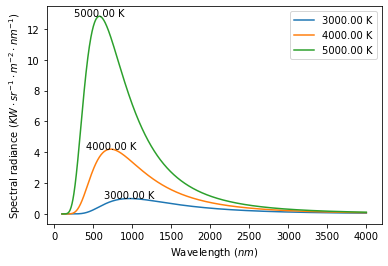

In [8]:
%matplotlib inline

#Plot
text_x = wavelength[rad.argmax(axis=0)] * 1e9
text_y = rad.max(axis=0) / 1e3/ 1e9
temp_srt = ['%.2f K' % t for t in temp]


fig, ax = plt.subplots()
ax.plot(wavelength * 1e9, rad / 1e3 / 1e9)
for _x, _y, _temp in zip(text_x, text_y, temp_srt):
  ax.text(_x, _y, _temp, ha='center')

plt.legend(labels=['%.2f K' % t for t in temp])

plt.xlabel(r'Wavelength ($nm$)')
plt.ylabel(r'Spectral radiance ($KW \cdot sr^{-1} \cdot m^{-2} \cdot nm^{-1}$)')
plt.show()